# Daten-Analyse Spaceship Titanic

In [132]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree


# Load CSV into Dataframe from Data folder
df = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

In [133]:
df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [134]:
def convert_col_to_numerical(df, col):
    unique_vals = df[col].unique()
    val_dict = {}
    count = 0
    for val in unique_vals:
        val_dict[val] = count
        count += 1
    df[col] = df[col].replace(val_dict)
    return df


df[['Deck', 'Room', 'Side']] = df['Cabin'].str.split('/', expand=True)


df = convert_col_to_numerical(df, "HomePlanet") #
df = convert_col_to_numerical(df, "CryoSleep") # 0 = No, 1 = Yes
df = convert_col_to_numerical(df, "Deck") # 0 = A, 1 = B, 2 = C, 3 = D, 4 = E, 5 = F, 6 = G, 7 = T
df = convert_col_to_numerical(df, "Side") # 0 = left, 1 = right
df = convert_col_to_numerical(df, "VIP") # 0 = No, 1 = Yes


df["Deck"] = df["Deck"].astype(np.float64)


df['Age'].fillna(df['Age'].mean(), inplace=True)


PID = df['PassengerId']
df.drop(['PassengerId', 'Name', 'Cabin', 'Destination', "RoomService", "FoodCourt", "Spa", "VRDeck", "ShoppingMall", "Room"], axis=1, inplace=True)

#########################################################

df_test[['Deck', 'Room', 'Side']] = df_test['Cabin'].str.split('/', expand=True)


df_test = convert_col_to_numerical(df_test, "HomePlanet") #
df_test = convert_col_to_numerical(df_test, "CryoSleep") # 0 = No, 1 = Yes
df_test = convert_col_to_numerical(df_test, "Deck") # 0 = A, 1 = B, 2 = C, 3 = D, 4 = E, 5 = F, 6 = G, 7 = T
df_test = convert_col_to_numerical(df_test, "Side") # 0 = left, 1 = right
df_test = convert_col_to_numerical(df_test, "VIP") # 0 = No, 1 = Yes


df_test["Deck"] = df_test["Deck"].astype(np.float64)


df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)


PID = df_test['PassengerId']
df_test.drop(['PassengerId', 'Name', 'Cabin', 'Destination', "RoomService", "FoodCourt", "Spa", "VRDeck", "ShoppingMall", "Room"], axis=1, inplace=True)

In [135]:
df.head()

,HomePlanet,CryoSleep,Age,VIP,Transported,Deck,Side
0,0.0,0.0,39.0,0.0,False,0.0,0.0
1,1.0,0.0,24.0,0.0,True,1.0,1.0
2,0.0,0.0,58.0,1.0,False,2.0,1.0
3,0.0,0.0,33.0,0.0,False,2.0,1.0
4,1.0,0.0,16.0,0.0,True,1.0,1.0


<Axes: >

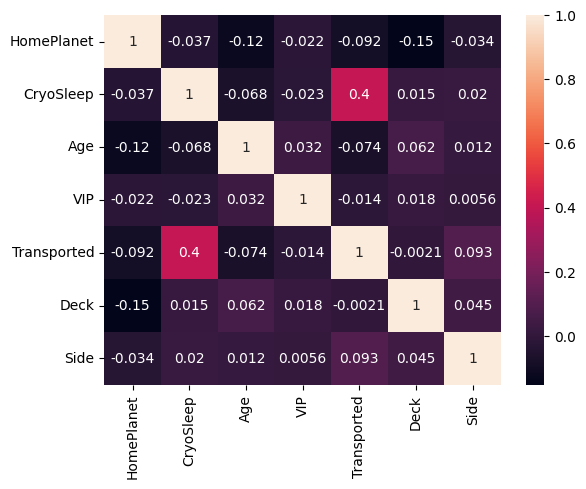

In [136]:
sns.heatmap(df.corr(), annot=True)

In [137]:
print(df.shape)
df.loc[df["Age"]<=18].value_counts()

(8693, 7)


HomePlanet  CryoSleep  Age   VIP  Transported  Deck  Side
1.0         0.0        18.0  0.0  False        1.0   0.0     38
            1.0        18.0  0.0  True         3.0   1.0     26
            0.0        18.0  0.0  False        1.0   1.0     24
            1.0        0.0   0.0  True         3.0   1.0     23
                                                     0.0     22
                                                             ..
            0.0        16.0  2.0  True         1.0   1.0      1
                                  False        3.0   0.0      1
                                               1.0   0.0      1
                             0.0  False        5.0   1.0      1
3.0         2.0        18.0  0.0  True         7.0   1.0      1
Name: count, Length: 584, dtype: int64

In [138]:
X = df.drop(['Transported'], axis=1)
y  = df['Transported']

X_train = X[:int(0.8*len(X))]
y_train = y[:int(0.8*len(y))]

X_test = X[int(0.8*len(X)):]
y_test = y[int(0.8*len(y)):]

In [139]:
# Use Adaboost on the training set
clf = AdaBoostClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.7314548591144335

In [140]:
# Use AdaBoost on the test.csv
Transported = clf.predict(df_test)

# Create Dataframe with ids and survived
output = pd.DataFrame({'PassengerId': PID, 'Transported': Transported})
output.head()

# output to csv
output.to_csv('submission.csv', index=False)